1. Explanatory Dataset

In [ ]:
# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

In [ ]:
# Import google drive ke google colab

from google.colab import drive

In [ ]:
# connect google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# memasukkan file csv sesuai path di google drive

path = '/content/drive/MyDrive/PASG MP1B/diabetes.csv'

In [ ]:
# Membaca dataset

df = pd.read_csv(path)

In [ ]:
# Tampilkan beberapa baris pertama dataset untuk melihat struktur data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Memeriksa data yang hilang

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Melihat informasi umum tentang dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Melihat statistik deskriptif untuk kolom numerik

print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# Mengganti nilai kolom 'Outcome' dari (1, 0) menjadi (Yes, No)

df['Outcome'] = df['Outcome'].replace({1: 'Yes', 0: 'No'})

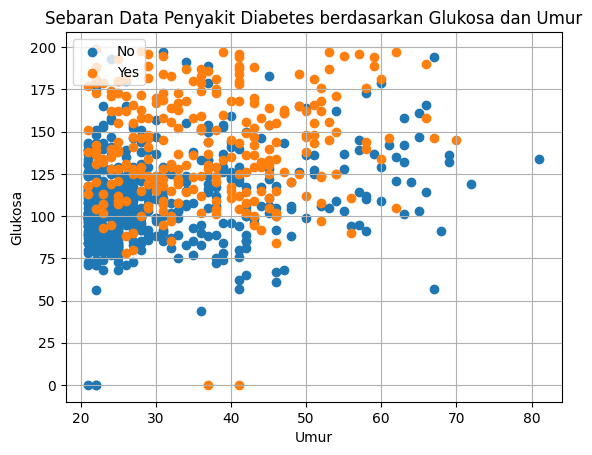

In [ ]:
 # Visualisasi Data

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Outcome'
for Age, d in df.groupby('Outcome'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Age' (umur), y = data 'Glucose' (kadar glukosa)
    # 'label=Age' memberikan label untuk setiap grup (diambil dari nilai kolom 'Outcome')
    ax.scatter(d['Age'], d['Glucose'], label=Age)

# Menambahkan legenda untuk membedakan grup berdasarkan 'Outcome'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Penyakit Diabetes berdasarkan Glukosa dan Umur')

# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Umur')

# Menambahkan label pada sumbu y (Glukosa)
plt.ylabel('Glukosa')

# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)

# Menampilkan plot ke layar
plt.show()

2. Preprocessing Dengan Label Binarizer

In [ ]:
# Mengonversi kolom 'Age' dan 'Glucose' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['Age', 'Glucose']])

# Mengonversi kolom 'Outcome' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['Outcome'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')

# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[ 50 148]
 [ 31  85]
 [ 32 183]
 ...
 [ 30 121]
 [ 47 126]
 [ 23  93]]

y_train: ['Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'N

In [ ]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: {y_train}')

y_train: [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 

In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0

3. Training KNN Classification Model

In [ ]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

4. Prediksi dengan KNN Classification Model

In [ ]:
# Prediksi Resiko Penyakit (Outcome)

# Menetapkan nilai umur (A_Age) dan kadar glukosa (A_Glucose) untuk data baru
A_Age = 50
A_Glucose = 100

# Membuat array NumPy dengan data baru [A_Age, A_Glucose] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([A_Age, A_Glucose]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[ 50, 100]])

In [ ]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (outcome) untuk data baru
y_new

array([1])

In [ ]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya (misalnya, yes atau no).
lb.inverse_transform(y_new)

array(['Yes'], dtype='<U3')

5. Visualisasi Nearest Neighbours

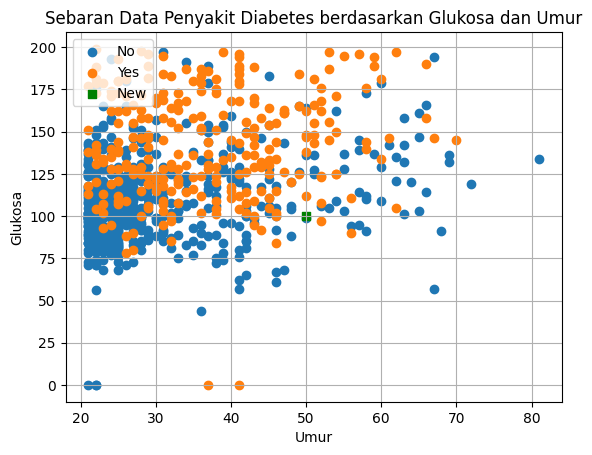

In [ ]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Outcome'
for Age, d in df.groupby('Outcome'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Age' (umur), y = data 'Glucose' (kadar glukosa)
    # 'label=Age' memberikan label untuk setiap grup (diambil dari nilai kolom 'Outcome')
    ax.scatter(d['Age'], d['Glucose'], label=Age)

# Menambahkan titik data baru (A_Age, A_Glucose) dengan gaya khusus
# Titik ini digambarkan dengan bentuk persegi ('marker='s'') dan warna hijau
# Label 'Misterius' akan muncul di legenda untuk titik ini
plt.scatter(A_Age,
            A_Glucose,
            marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
            color='green',  # Menentukan warna titik data baru menjadi hijau
            label='New')  # Label untuk titik data baru

# Menambahkan legenda untuk membedakan grup berdasarkan 'Outcome' dan data baru 'Misterius'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Penyakit Diabetes berdasarkan Glukosa dan Umur')

# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Umur')

# Menambahkan label pada sumbu y (Glukosa)
plt.ylabel('Glukosa')

# Menambahkan grid ke plot untuk mempermudah pembacaan visual
plt.grid(True)

# Menampilkan plot ke layar
plt.show()


6. Kalkulasi Distance (Euclidean Distance)

In [ ]:
# Membuat array NumPy baru dengan data umur (A_Age) dan kadar glukosa (A_Glucose)
# Data ini disimpan dalam array 1D yang berisi dua nilai: umur dan kadar glukosa
New = np.array([A_Age, A_Glucose])

# Menampilkan array 'New' yang berisi nilai umur dan kadar glukosa
New

array([ 50, 100])

In [ ]:
# 'x_train' adalah array atau DataFrame yang berisi data latih (fitur) yang digunakan untuk melatih model
# Dalam konteks ini, 'x_train' berisi dua kolom fitur: 'Age' (Umur) dan 'Glucose' (Kadar Glukosa),
x_train

array([[ 50, 148],
       [ 31,  85],
       [ 32, 183],
       ...,
       [ 30, 121],
       [ 47, 126],
       [ 23,  93]])

In [ ]:
# Menghitung jarak Euclidean antara data baru (New) dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(New, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak

[48.0,
 24.20743687382041,
 84.92938243034621,
 31.016124838541646,
 40.718546143004666,
 25.612496949731394,
 32.55764119219941,
 25.80697580112788,
 97.04638066409278,
 25.317977802344327,
 22.360679774997898,
 69.85699678629192,
 39.6232255123179,
 89.45389874119518,
 66.007575322837,
 18.0,
 26.1725046566048,
 20.248456731316587,
 17.26267650163207,
 23.430749027719962,
 34.713109915419565,
 1.0,
 96.42095207992918,
 28.319604517012593,
 43.01162633521314,
 26.570660511172846,
 47.51841748206689,
 28.160255680657446,
 45.5411901469428,
 20.808652046684813,
 13.45362404707371,
 62.03224967708329,
 30.463092423455635,
 23.40939982143925,
 22.561028345356956,
 17.26267650163207,
 40.85339643163099,
 4.47213595499958,
 25.079872407968907,
 12.529964086141668,
 83.5224520712844,
 35.4682957019364,
 6.324555320336759,
 71.11258679024411,
 59.841457201508724,
 83.81527307120105,
 50.566787519082126,
 40.311288741492746,
 19.235384061671343,
 26.476404589747453,
 28.160255680657446,
 24.02

In [ ]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data baru (New) dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df.sort_values(['jarak'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,jarak
21,8,99,84,0,0,35.4,0.388,50,No,1.000000
719,5,97,76,27,0,35.6,0.378,52,Yes,3.605551
298,14,100,78,25,184,36.6,0.412,46,Yes,4.000000
745,12,100,84,33,105,30.0,0.488,46,No,4.000000
636,5,104,74,0,0,28.8,0.153,48,No,4.472136
...,...,...,...,...,...,...,...,...,...,...
349,5,0,80,32,0,41.0,0.346,37,Yes,100.841460
661,1,199,76,43,0,42.9,1.394,22,Yes,102.883429
342,1,0,68,35,0,32.0,0.389,22,No,103.846040
75,1,0,48,20,0,24.7,0.140,22,No,103.846040


7. Evaluasi KNN Classification Model

In [ ]:
#Testing Set

# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
# Setiap baris dalam 'x_test' berisi dua nilai: umur dan kadar glukosa untuk masing-masing data uji
x_test = np.array([[20, 30], [40, 200], [35, 100], [55, 45]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil untuk masing-masing data uji
# Label target adalah 'Yes' atau 'No', yang diubah menjadi format biner menggunakan LabelBinarizer
# Fungsi 'transform()' mengonversi label asli ('Yes' dan 'No') menjadi angka biner (1 untuk 'Yes', 0 untuk 'No')
y_test = lb.transform(np.array(['No', 'Yes', 'No', 'Yes'])).flatten()

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (umur dan glukosa)
print(f'x_test:\n{x_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test: {y_test}')

x_test:
[[ 20  30]
 [ 40 200]
 [ 35 100]
 [ 55  45]]

y_test: [0 1 0 1]


In [ ]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target (misalnya, 'Yes' atau 'No') untuk setiap data di 'x_test'
y_pred = model.predict(x_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
y_pred

array([0, 1, 1, 0])

8. Evaluasi Model Dengan Accuracy Score

In [ ]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
# 'acc' berisi nilai akurasi yang menunjukkan seberapa tepat model dalam memprediksi label yang benar
print(f'Accuracy: {acc}')

Accuracy: 0.5


9. Evaluasi Model Dengan Precision Score

In [ ]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
# 'prec' berisi nilai presisi yang menunjukkan seberapa akurat model dalam mengklasifikasikan kelas positif (misalnya 'Yes')
print(f'Precision: {prec}')

Precision: 0.5


10. Evaluasi Model Dengan Recall Score

In [ ]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
# 'rec' berisi nilai recall yang menunjukkan seberapa baik model dalam mendeteksi semua kasus positif
print(f'Recall: {rec}')

Recall: 0.5


11. Evaluasi Model Dengan F1 Score

In [ ]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
# 'f1' berisi nilai F1 score yang menunjukkan keseimbangan antara presisi dan recall untuk model
print(f'F1 Score: {f1}')

F1 Score: 0.5


12. Evaluasi Model Dengan Classification Report

In [ ]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'Yes' dan 'No')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
# 'cls_report' berisi ringkasan metrik evaluasi model yang memberikan informasi detail tentang kinerja model per kelas
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



13. Evaluasi Model Dengan Matthews Correlation Coefficient (MCC)

In [ ]:
# Menghitung Matthews Correlation Coefficient (MCC) untuk menilai kinerja model secara keseluruhan
# Fungsi 'matthews_corrcoef()' dari sklearn.metrics digunakan untuk menghitung MCC
# MCC adalah metrik yang mengukur kualitas prediksi dalam masalah klasifikasi biner
# Nilai MCC berkisar antara -1 (prediksi sepenuhnya salah) hingga +1 (prediksi sepenuhnya benar),
# dan nilai 0 menunjukkan prediksi acak atau model yang tidak lebih baik dari tebakan acak
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan nilai MCC yang dihitung
# 'mcc' berisi nilai Matthews Correlation Coefficient yang menunjukkan seberapa baik model dalam memprediksi kelas positif dan negatif
print(f'MCC: {mcc}')

MCC: 0.0
